## # Introduction
<p><img src="https://assets.datacamp.com/production/project_1010/img/book_cover.jpg" alt="The book cover of Peter and Wendy" style="width:183;height:253px;"></p>
<h3 id="flyawaywithpeterpan">Fly away with Peter Pan!</h3>
<p>Peter Pan has been the companion of many children, and went a long way, starting as a Christmas play and ending up as a Disney classic. Did you know that although the play was titled "Peter Pan, Or The Boy Who Wouldn't Grow Up", J. M. Barrie's novel was actually titled "Peter and Wendy"? </p>
<p>You're going to explore and analyze Peter Pan's text to answer the question in the instruction pane below. You are working with the text version available here at <a href="https://www.gutenberg.org/files/16/16-h/16-h.htm">Project Gutenberg</a>. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. <a href="https://www.datacamp.com/courses/intermediate-importing-data-in-python">Intermediate Importing Data in Python</a> and <a href="https://www.datacamp.com/courses/introduction-to-natural-language-processing-in-python">Introduction to Natural Language Processing in Python</a> teach the skills required to complete this project. Should you decide to use them, English stopwords have been downloaded from <code>nltk</code> and are available for you in your environment.</p>

In [7]:
# Use this cell to begin your analysis, and add as many as you would like!
import requests
import nltk
from bs4 import BeautifulSoup
from collections import Counter

In [8]:
#requesting the data from the html page Project gutenburg which has peter pan book
r=requests.get("https://www.gutenberg.org/files/16/16-h/16-h.htm")

#encoding to utf-8 data format
r.encoding="utf-8"

#extract text this is contents of web page html tags and format with css with need the text data
html=r.text





In [10]:
#assigning html to soup creating a soup object
soup = BeautifulSoup(html)

#extracting only the text data
text=soup.text

print(text[:2000])

﻿




      Peter Pan, by J. M. Barrie
    


    body { margin:5%; background:#faebd0; text-align:justify}
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
    .toc2      { margin-left: 20%;}
    div.fig { display:block; margin:0 auto; text-align:center; }
    .figleft   {float: left; margin-left: 0%; margin-right: 1%;}
    .figright  {float: right; margin-right: 0%; margin-left: 1%;}
    pre     { font-style: italic; font-size: 90%; margin-left: 

In [11]:
#tokenization seperating text data into smaller units words
tokenizer=nltk.tokenize.RegexpTokenizer("\w+")

#applying tokenizer to text
tokens=tokenizer.tokenize(text)

print(tokens[:10])

['Peter', 'Pan', 'by', 'J', 'M', 'Barrie', 'body', 'margin', '5', 'background']


In [12]:
#lowering all the tockens and stoing in words list
words=[token.lower() for token in tokens]

print(words[:10])

['peter', 'pan', 'by', 'j', 'm', 'barrie', 'body', 'margin', '5', 'background']


In [13]:
#Removeing the stopwords : they dont have any meaning a,an,the etc
stop_words=nltk.corpus.stopwords.words('english')
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [15]:
#Filter stop words from the words list

words_cleaned=[word for word in words if word not in stop_words]
words_cleaned2=[]
for word in words_cleaned:
    if len(word)!=1 and word.isalpha()==True:
        words_cleaned2.append(word)

print(words_cleaned2[:10])

['peter', 'pan', 'barrie', 'body', 'margin', 'background', 'text', 'align', 'justify', 'text']


In [17]:
#counting the words
count=Counter(words_cleaned2)

top_ten=count.most_common(10)
print(top_ten)

[('peter', 410), ('wendy', 362), ('said', 358), ('would', 219), ('one', 214), ('hook', 175), ('could', 142), ('cried', 136), ('john', 133), ('time', 126)]


Text(0.5, 1.0, "Peter Pan's Most common words")

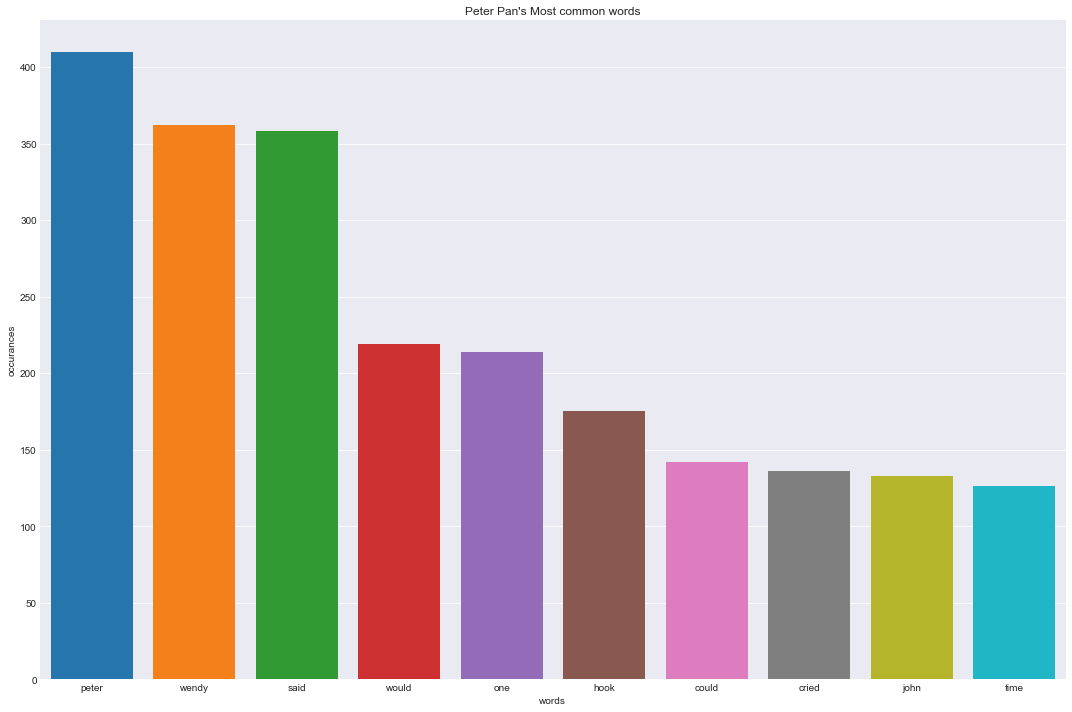

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.DataFrame(top_ten,columns=['words','occurances'])

sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x='words',y='occurances',data=df,saturation=0.9).set_title("Peter Pan's Most common words")